## Nueral network
- 퍼셉트론, 다층 퍼셉트론(MLP, multilayer perceptron)
- Activation function, Gradient Descent, SGD
- Back propagation


## Sequential 
- 가장 간단한 모델
- 선형 파이프라인(스택)을 정의

#### Dense ?
- 각 레이어의 뉴런들이, 인접한 레이어의 모든 뉴런들과 빽빽히 연결되어 있는 구조

In [1]:
from keras.layers.core import Dense
from keras.models import Sequential

# model = Sequential()
# model.add(Dense(12, input_dim=8, kernel_initializer="random_uniform"))

Using TensorFlow backend.


#### Weight 초기화 옵션들 ( https://keras.io/initializers/ )
- random_uniform, random_normal, zero 등등..
- 참고자료 ; uniform distribution vs. normal distribution  
   (https://www.quora.com/What-is-the-difference-between-normal-distribution-and-uniform-distribution)

#### Activation function ( https://keras.io/activations/ )
- sigmoid ; f(x) = 1 / (1 + e^(-x))
- ReLU ; f(x) = max(0, x)
- etc.

## MNIST 예제로 감잡기
- 6만개 학습 셋, 1만개 테스트 셋
- 각 클래스는 One hot encoding으로 표현

In [2]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.optimizers import SGD
from keras.utils import np_utils

import matplotlib.pyplot as plt

NB_EPOCH = 200
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10
OPTIMIZER = SGD()
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2 # training data 중 얼마나 validation set으로 쓸지
DROPOUT = 0.3

#### 데이터 로드

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
RESHAPED = 784

X_train = X_train.reshape(60000, RESHAPED).astype('float32')
X_test = X_test.reshape(10000, RESHAPED).astype('float32')

# 0~1
X_train /= 255
X_test /= 255

# one hot vector
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

#### 모델 정의

In [6]:
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
__________

#### Loss Function 
- https://keras.io/losses/
- MSE ; 예측 값, 실제 값 사이의 평균 제곱 오차
- Binary Cross Entropy ; *-t* x *log(p)* - *(1 - t)* x *log(1 - p)*
- etc.

#### Metric
- https://keras.io/metrics
- Accuracy, Precisionm, Recall

#### 모델 컴파일

In [7]:
model.compile(loss='categorical_crossentropy',
             optimizer=OPTIMIZER,
             metrics=['accuracy'])

#### 모델 학습
- epochs ; 학습 데이터셋 전체를 살펴본 횟수
- batch_size ; 옵티마이저가 가중치 업데이트를 하기 전까지 살펴본 데이터 수
- **학습 정확도는 반드시 테스트 정확도보다 높아**야 함!! (그렇지 않으면 충분히 학습된게 아니라하네)

In [8]:
history = model.fit(X_train, Y_train,
                   batch_size=BATCH_SIZE, epochs=NB_EPOCH,
                   verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Train on 48000 samples, validate on 12000 samples
Epoch 1/200
48000/48000 [==============================] - 1s 27us/step - loss: 1.7526 - acc: 0.4450 - val_loss: 0.9427 - val_acc: 0.8023
Epoch 2/200
48000/48000 [==============================] - 1s 24us/step - loss: 0.9411 - acc: 0.7125 - val_loss: 0.5453 - val_acc: 0.8633
Epoch 3/200
48000/48000 [==============================] - 1s 23us/step - loss: 0.7101 - acc: 0.7834 - val_loss: 0.4324 - val_acc: 0.8833
Epoch 4/200
48000/48000 [==============================] - 1s 25us/step - loss: 0.6015 - acc: 0.8168 - val_loss: 0.3777 - val_acc: 0.8940
Epoch 5/200
48000/48000 [==============================] - 1s 26us/step - loss: 0.5430 - acc: 0.8362 - val_loss: 0.3435 - val_acc: 0.9031
Epoch 6/200
48000/48000 [==============================] - 1s 24us/step - loss: 0.4979 - acc: 0.8520 - val_loss: 0.3194 - val_acc: 0.9080
Epoch 7/200
48000/48000 [==============================] - 1s 23us/step - loss: 0.4630 - acc: 0.8629 - val_loss: 0.3024 - 

48000/48000 [==============================] - 1s 25us/step - loss: 0.1638 - acc: 0.9511 - val_loss: 0.1146 - val_acc: 0.9668
Epoch 60/200
48000/48000 [==============================] - 1s 25us/step - loss: 0.1616 - acc: 0.9521 - val_loss: 0.1138 - val_acc: 0.9676
Epoch 61/200
48000/48000 [==============================] - 1s 24us/step - loss: 0.1613 - acc: 0.9531 - val_loss: 0.1130 - val_acc: 0.9674
Epoch 62/200
48000/48000 [==============================] - 1s 25us/step - loss: 0.1584 - acc: 0.9529 - val_loss: 0.1123 - val_acc: 0.9678
Epoch 63/200
48000/48000 [==============================] - 1s 25us/step - loss: 0.1564 - acc: 0.9541 - val_loss: 0.1113 - val_acc: 0.9677
Epoch 64/200
48000/48000 [==============================] - 1s 24us/step - loss: 0.1550 - acc: 0.9550 - val_loss: 0.1103 - val_acc: 0.9684
Epoch 65/200
48000/48000 [==============================] - 1s 24us/step - loss: 0.1557 - acc: 0.9537 - val_loss: 0.1092 - val_acc: 0.9683
Epoch 66/200
48000/48000 [==============

Epoch 118/200
48000/48000 [==============================] - 1s 24us/step - loss: 0.1070 - acc: 0.9669 - val_loss: 0.0880 - val_acc: 0.9737
Epoch 119/200
48000/48000 [==============================] - 1s 23us/step - loss: 0.1041 - acc: 0.9689 - val_loss: 0.0885 - val_acc: 0.9731
Epoch 120/200
48000/48000 [==============================] - 1s 22us/step - loss: 0.1053 - acc: 0.9685 - val_loss: 0.0875 - val_acc: 0.9740
Epoch 121/200
48000/48000 [==============================] - 1s 23us/step - loss: 0.1045 - acc: 0.9676 - val_loss: 0.0878 - val_acc: 0.9735
Epoch 122/200
48000/48000 [==============================] - 1s 23us/step - loss: 0.1031 - acc: 0.9700 - val_loss: 0.0880 - val_acc: 0.9738
Epoch 123/200
48000/48000 [==============================] - 1s 23us/step - loss: 0.1029 - acc: 0.9689 - val_loss: 0.0872 - val_acc: 0.9740
Epoch 124/200
48000/48000 [==============================] - 1s 22us/step - loss: 0.1035 - acc: 0.9682 - val_loss: 0.0868 - val_acc: 0.9734
Epoch 125/200
48000/

48000/48000 [==============================] - 1s 26us/step - loss: 0.0800 - acc: 0.9755 - val_loss: 0.0787 - val_acc: 0.9768
Epoch 177/200
48000/48000 [==============================] - 1s 24us/step - loss: 0.0801 - acc: 0.9758 - val_loss: 0.0795 - val_acc: 0.9766
Epoch 178/200
48000/48000 [==============================] - 1s 24us/step - loss: 0.0803 - acc: 0.9754 - val_loss: 0.0791 - val_acc: 0.9770
Epoch 179/200
48000/48000 [==============================] - 1s 24us/step - loss: 0.0787 - acc: 0.9755 - val_loss: 0.0790 - val_acc: 0.9768
Epoch 180/200
48000/48000 [==============================] - 1s 24us/step - loss: 0.0772 - acc: 0.9765 - val_loss: 0.0789 - val_acc: 0.9768
Epoch 181/200
48000/48000 [==============================] - 1s 24us/step - loss: 0.0779 - acc: 0.9757 - val_loss: 0.0790 - val_acc: 0.9769
Epoch 182/200
48000/48000 [==============================] - 1s 24us/step - loss: 0.0768 - acc: 0.9765 - val_loss: 0.0790 - val_acc: 0.9763
Epoch 183/200
48000/48000 [=======

#### 모델 평가

In [9]:
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score:", score[0])
print("Test accuracy:", score[1])

10000/10000 [==============================] - 0s 23us/step
Test score: 0.07439806119957938
Test accuracy: 0.978


#### 시각화

In [11]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

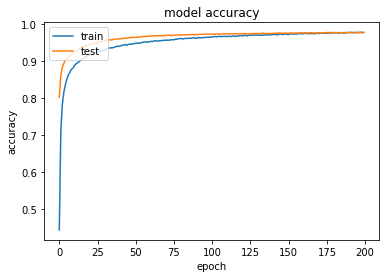

In [12]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.